### Load data from huggingface dataset

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [6]:
dataset_v1_00 = load_dataset('amazon_us_reviews', 'Baby_v1_00')
df = dataset_v1_00['train'].to_pandas()
df.info()

Using the latest cached version of the module from /Users/linwang/.cache/huggingface/modules/datasets_modules/datasets/amazon_us_reviews/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563 (last modified on Tue Jun 13 21:28:22 2023) since it couldn't be found locally at amazon_us_reviews., or remotely on the Hugging Face Hub.
Found cached dataset amazon_us_reviews (/Users/linwang/.cache/huggingface/datasets/amazon_us_reviews/Baby_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)
100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752932 entries, 0 to 1752931
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        object
 2   review_id          object
 3   product_id         object
 4   product_parent     object
 5   product_title      object
 6   product_category   object
 7   star_rating        int32 
 8   helpful_votes      int32 
 9   total_votes        int32 
 10  vine               int64 
 11  verified_purchase  int64 
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int32(3), int64(2), object(10)
memory usage: 180.5+ MB


In [8]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,9970739,R8EWA1OFT84NX,B00GSP5D94,329991347,Summer Infant SwaddleMe Adjustable Infant Wrap...,Baby,5,0,0,0,1,Great swaddled blankets,Loved these swaddle blankets and so did my dau...,2015-08-31
1,US,23538442,R2JWY4YRQD4FOP,B00YYDDZGU,646108902,Pacifier Clip Girl (3 Pack) Ziggy Baby 2-Sided...,Baby,5,0,0,0,0,Too cute and really nice,These are adorable pacifier clips. SavvyBaby h...,2015-08-31
2,US,8273344,RL5ESX231LZ0B,B00BUBNZC8,642922361,Udder Covers - Breast Feeding Nursing Cover,Baby,5,0,0,0,1,Five Stars,Great gift,2015-08-31
3,US,24557753,RRMS9ZWJ2KD08,B00AWLZFTS,494272733,Gerber Graduates Fun Pack Utensils,Baby,5,0,0,0,1,Cute; wash up nicely in dishwasher.,These forks are great for my 10 month old daug...,2015-08-31
4,US,46263340,R14I3ZG5E6S7YM,B00KM60D3Q,305813185,Summer Infant Ultra Sight Pan/Scan/Zoom Video ...,Baby,5,0,0,0,1,Love it!,I wanted something for piece of mind with my l...,2015-08-31


In [9]:
df['review_date'] = pd.to_datetime(df['review_date'])

### Save data to local dictionary

In [10]:
df_path = '/Users/linwang/Documents/AmaRec/data/raw/'
df.to_csv(df_path+'raw_data.csv', index=False)

### Read data

In [2]:
df_path = '/Users/linwang/Documents/AmaRec/data/raw/'
df = pd.read_csv(df_path+'raw_data.csv')

### Select data in 2015 and only include verified purchases

In [3]:
df_use = df[(df['review_date']>'2014-12-31') & (df['verified_purchase']==1)]
df_use.shape

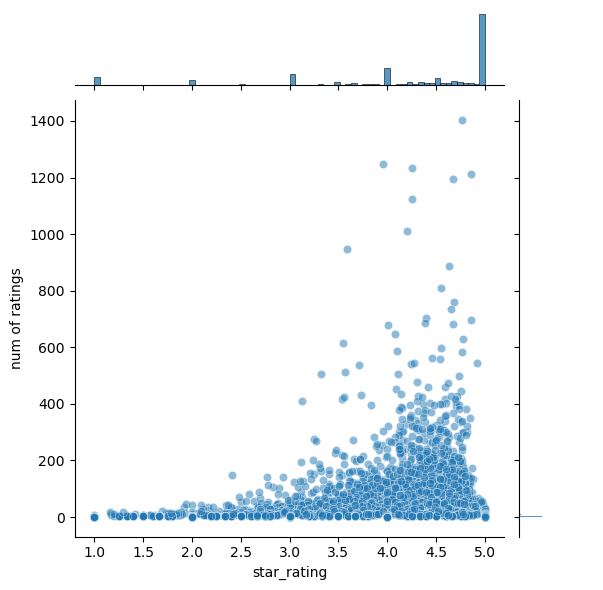

In [24]:
ratings = pd.DataFrame(df_use.groupby('product_title')['star_rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df_use.groupby('product_title')['star_rating'].count())
sns.jointplot(x='star_rating',y='num of ratings',data=ratings,alpha=0.5)
plt.savefig('rating_distribution.png')

### Select customer_id with the most reviews

In [17]:
top_customers = df_use['customer_id'].value_counts().head(20)
df_top20 = df_use[df_use['customer_id']==top_customers.index[0]]
df_top20[['customer_id','product_title','review_headline']]

,customer_id,product_title,review_headline
191617,13867682,BABYBJORN Potty Chair,"OK, not outstanding for us"
225555,13867682,Prince Lionheart 2 Stage Seatsaver,Perfect for Graco seat in CR-V
226015,13867682,Prince Lionheart Backseat Kick Mat,Excellent seat saver
228417,13867682,Trend Lab Cotton CribWrap Wide Rail Cover for ...,Fantastic crib rail covers!
228717,13867682,"NUK Learner Cup BPA Free Silicone Spout, Singl...",Toddler didn't like it
...,...,...,...
336730,13867682,Munchkin Feeding Set,Using for nine months - highly recommend
336801,13867682,Nuby Super Spout No Spill Replacement Spouts C...,Good while toothless
337719,13867682,Everything Kids Toddler Bedding Set,Used on crib mattress
337874,13867682,"Nuby Super Spout Easy Gripper, 10 Ounce",Good until the teeth show up


<Axes: >

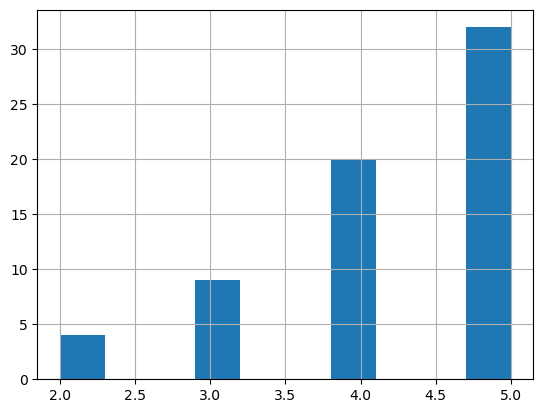

In [18]:
df_top20['star_rating'].hist()

### Randomly select 20 customer_id from the single review customers

In [19]:
single_review_customers = df_use['customer_id'].value_counts()[df_use['customer_id'].value_counts() == 1].index
select_id = single_review_customers.to_series().sample(20).index
df_bottom20 = df_use[df_use['customer_id'].isin(select_id)]
df_bottom20[['customer_id','product_title','review_headline']]

,customer_id,product_title,review_headline
26353,12088328,Iwotou Adjustable Multi Use Safety Strap Latches,Five Stars
38584,10236018,Kiinde Kozii Bottle Warmer and Breast Milk Warmer,Worth Every Dime
55968,47609866,Mommy's Helper Car Seat Sun Shade,buckles and seat still hot
68708,49266921,Hudson Baby Printed Mink Blanket with Dotted B...,Awesome
115225,38538109,Car Seat Sunshade by Freddie and Sebbie - Luxu...,We are so happy. In Phoenix
121176,31655967,"Safety 1st Sit Booster Seat, Green",A great booster seat for babys
137799,14285300,Clevamama Full Length Bath Mat with Kneeling C...,So far so good
144111,11142180,Leachco Flipper 2-Way Baby Bather -Frog Pond,Great!
155058,43476040,Lotus Travel Crib and Portable Baby Playard,Convenient
189407,51687263,"Fire HD 7 Screen Protector (4th Generation, 20...",Not Anti Glare (Matte Finish)


<Axes: >

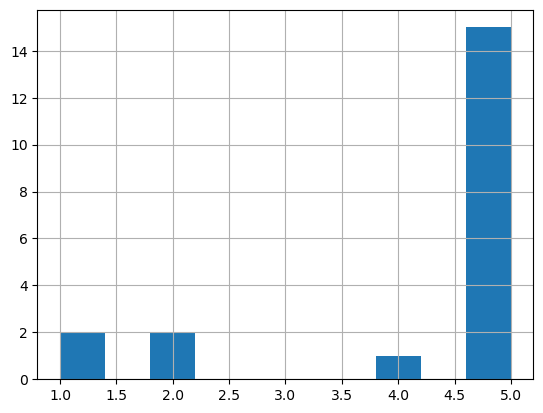

In [20]:
df_bottom20['star_rating'].hist()